In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_dir="/content/drive/My Drive/Colab Notebooks/tumour"

In [4]:
train_dir=os.path.join(base_dir,'train')
train_yes_dir=os.path.join(train_dir,'yes')
train_no_dir=os.path.join(train_dir,'no')

In [5]:
validation_dir=os.path.join(base_dir,'validation')
validation_yes_dir=os.path.join(validation_dir,'yes')
validation_no_dir=os.path.join(validation_dir,'no')

In [6]:
test_dir=os.path.join(base_dir,'test')
test_yes_dir=os.path.join(test_dir,'yes')
test_no_dir=os.path.join(test_dir,'no')

In [7]:
train_yes_fnames=os.listdir(train_yes_dir)
train_no_fnames=os.listdir(train_no_dir)

In [8]:
print(train_yes_fnames[:10])

['Y13.jpg', 'Y54.jpg', 'Y23.JPG', 'Y22.jpg', 'Y8.jpg', 'Y74.jpg', 'Y26.jpg', 'Y66.JPG', 'Y38.jpg', 'Y2.jpg']


In [9]:
print(train_no_fnames[:10])

['47 no.jpg', '24 no.jpg', '38 no.jpg', '3 no.jpg', '42 no.jpg', '27 no.jpg', '30 no.jpg', '43 no.jpg', '10 no.jpg', '9 no.jpg']


In [10]:
print("total training yes images={}".format(len(os.listdir(train_yes_dir))))
print("total training no images={}".format(len(os.listdir(train_no_dir))))

total training yes images=172
total training no images=104


In [11]:
print("total testing yes images={}".format(len(os.listdir(test_yes_dir))))
print("total testing no images={}".format(len(os.listdir(test_no_dir))))

total testing yes images=42
total testing no images=23


In [12]:
print("total validation yes images={}".format(len(os.listdir(validation_yes_dir))))
print("total validation no images={}".format(len(os.listdir(validation_no_dir))))


total validation yes images=96
total validation no images=69


In [13]:
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

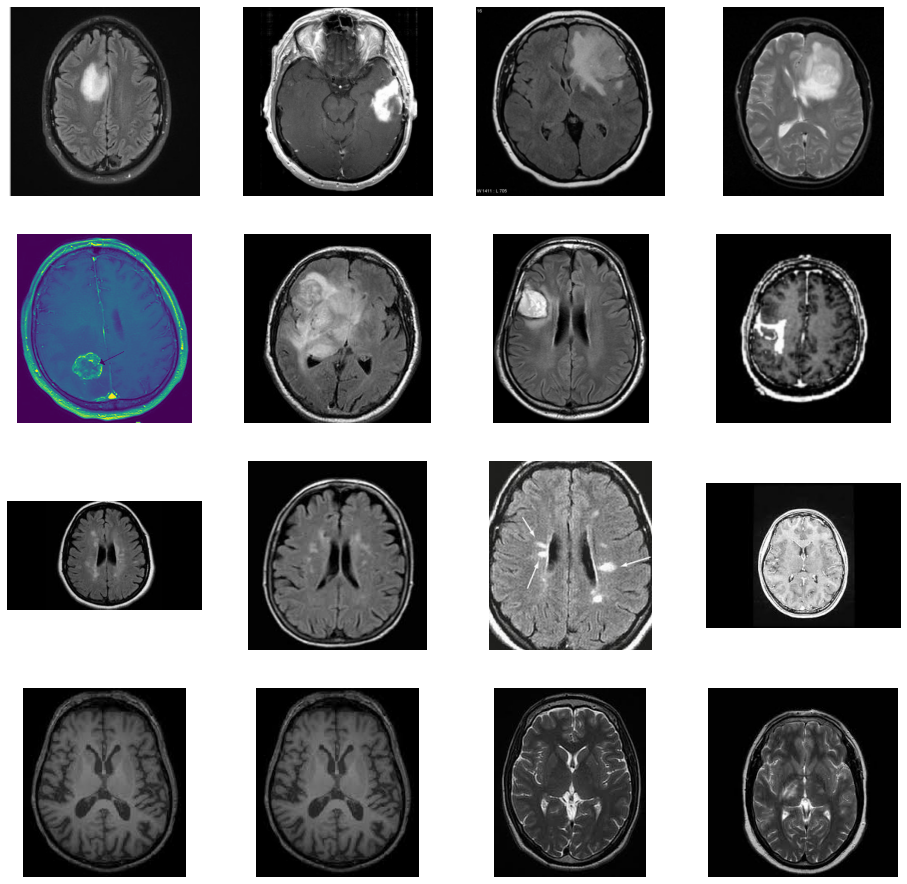

In [30]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_yes_pix = [os.path.join(train_yes_dir, fname) 
                for fname in train_yes_fnames[pic_index-8:pic_index]]
next_no_pix = [os.path.join(train_no_dir, fname) 
                for fname in train_no_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_yes_pix+next_no_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [15]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
          if(logs.get('accuracy')>0.83):
            #if(logs.get('acc')>0.83):
            print("\nReached desired accuracy so cancelling training!")
            self.model.stop_training = True

DATA PREPROCESSING:

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescaled all images
train_datagen=ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=40,
    #shift moves the image around its frame.
    width_shift_range=0.2,
    height_shift_range=0.2,
    #shear_range will shear the image by random amounts up to the specific portion in the image.
    shear_range=0.15,
    zoom_range=0.15,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range = (0.5, 1.5),
     )
validation_datagen=ImageDataGenerator(rescale=1.0/255.)


In [17]:
#flow training images in batches of 10 using train_datagen generator
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=10,class_mode="binary",target_size=(128,128))
#flow validation images in batches of 10 using test_datagen_generator
validation_generator=validation_datagen.flow_from_directory(validation_dir,batch_size=10,class_mode="binary",target_size=(128,128))

Found 276 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


MODEL DEFINITION:

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
#we extratcted 16 features in first cnn layer and kernel size is (3,3) and image size is 150*150 with 3 channels
callbacks = myCallback()
model=Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
tf.keras.layers.MaxPooling2D(2,2),#max pooling layer reduce size of feature frame we have now 75*75 feature layer
tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation="relu"), 
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation="relu"),  
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(256,(3,3),activation="relu"),  
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation="relu"),#512 neurons in hidden layer
tf.keras.layers.Dense(1,activation="sigmoid") 
])


In [19]:
model.summary()#summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       7

In [20]:
#param calculation:
#for dense layer
#output_size*(input_size+1)==number_parameters
#for conv layer
#output_channels*(input_channel*window_size+1)==number_parameters

#for 1 connv2D layer:
#16*(3*(3*3)+1)==448 params
#for 1 dense layer:
#512*(6272+1)==3211776 params

#none in the shape means it doesnot have a pre-defined number.For example it can be the batch size we use during training and we make
#it flexible by not assigning any value to it so that we can change our btach size.
#the model will infer the shape from the context of the layers.
#no of parameters is the amount of numbers that can be changed in the model.


In [21]:
#from tensorflow.keras.optimizer import RMSprop
#optimizers are like RMSprop ,gradient descent,SGD
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])#lr is learning rate,binary cross entropy is used for classification


In [26]:
#TRAINING

history=model.fit(train_generator,validation_data=validation_generator,epochs=15,verbose=2,callbacks=[callbacks])

Epoch 1/15
28/28 - 7s - loss: 0.5415 - accuracy: 0.7609 - val_loss: 0.4991 - val_accuracy: 0.7697
Epoch 2/15
28/28 - 7s - loss: 0.4951 - accuracy: 0.7862 - val_loss: 0.5186 - val_accuracy: 0.7576
Epoch 3/15
28/28 - 7s - loss: 0.4892 - accuracy: 0.7826 - val_loss: 0.4912 - val_accuracy: 0.7818
Epoch 4/15
28/28 - 7s - loss: 0.4440 - accuracy: 0.8225 - val_loss: 0.5234 - val_accuracy: 0.7576
Epoch 5/15
28/28 - 7s - loss: 0.4512 - accuracy: 0.8007 - val_loss: 0.4941 - val_accuracy: 0.7636
Epoch 6/15
28/28 - 7s - loss: 0.4528 - accuracy: 0.7971 - val_loss: 0.5084 - val_accuracy: 0.7758
Epoch 7/15
28/28 - 7s - loss: 0.4394 - accuracy: 0.8080 - val_loss: 0.5697 - val_accuracy: 0.7333
Epoch 8/15
28/28 - 7s - loss: 0.4267 - accuracy: 0.8188 - val_loss: 0.5866 - val_accuracy: 0.7394
Epoch 9/15
28/28 - 7s - loss: 0.4308 - accuracy: 0.8406 - val_loss: 0.5292 - val_accuracy: 0.7515

Reached desired accuracy so cancelling training!


Text(0.5, 1.0, 'Training and validation loss')

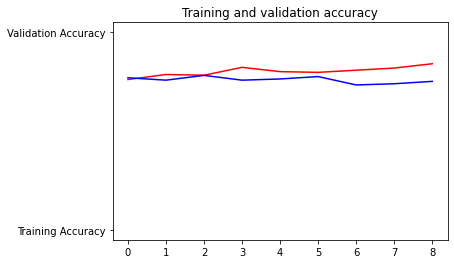

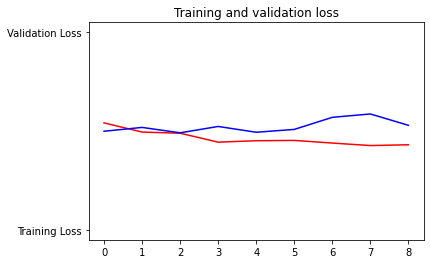

In [27]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(accuracy)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, accuracy, 'r', "Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


In [29]:
#diploy model on colab:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(128,128))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes=model.predict(images,batch_size=32)
if classes[0][0] == 1:
    prediction = 'yes'
else:
    prediction = 'no'
print(prediction)

Saving no 98.jpg to no 98.jpg
no
